# Import & configure library

In [1]:
import platform

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib
import Sastrawi
import gc
import itertools
import re
import time
from collections import Counter


In [2]:
print(f'{platform.python_version()=}')

print(f'{np.__version__=}')
print(f'{pd.__version__=}')
print(f'{sns.__version__=}')
print(f'{matplotlib.__version__=}')



platform.python_version()='3.8.3rc1'
np.__version__='1.17.4'
pd.__version__='1.0.3'
sns.__version__='0.10.1'
matplotlib.__version__='3.2.1'


In [3]:
SEED = 42
np.random.seed(SEED)

START_TIME = time.time()


# Load & join dataset
* Only select relevant column

In [4]:
animemanga_dataset = pd.read_json('./data/animemanga.json', orient='columns')
animemanga_dataset = animemanga_dataset[['title', 'content', 'topic']]
animemanga_dataset.sample(10)


,title,content,topic
4119,Toei Rilis Trailer 01.1 Anime CG 'Kado: The Ri...,"\nPada Tokyo Comic Con, booth Kado: The Right ...",anime_manga_news
3477,'Hunter x Hunter' Kembali Hiatus Selama Waktu ...,\nBerita buruk bagi para penggemar seri Hunter...,anime_manga_news
4322,Season Kedua 'Boku no Hero Academia' Akan Taya...,\nSeason kedua “Boku no Hero Academia” akan ta...,anime_manga_news
3349,Anime 'Taboo Tattoo' Umumkan Pengisi Suara Tam...,\nSetelah mengumumkan para pengisi suara untuk...,anime_manga_news
469,Adaptasi Anime Dari Light Novel Jinsei Diumumkan,\nVolume 7 dari light novel Jinsei mengumumkan...,anime_manga_news
538,Dicari! Pembunuh Yang Bisa Membunuh Korosensei!,\nShonen Jump rupanya juga kehabisan akal untu...,anime_manga_news
6635,eb-i Xpress Ungkap Hasil Survey Anime yang Pal...,\nSitus eb-i Xpress milik Kadokawa telah melak...,anime_manga_news
5820,Ayana Taketatsu dan iâRis Nyanyikan Lagu Tem...,\nGrimms Notes yang merupakan game mobile tela...,anime_manga_news
1047,10 Menit Pertama dari Gundam G-Reconguista Aka...,"\nSitus resmi untuk seri gundam terbaru, Mobil...",anime_manga_news
1219,"Anime Produksi Studio Trigger, ""Ninja Slayer"" ...",\nMajalah Sirius terbitan Kodansha edisi bulan...,anime_manga_news


In [5]:
kesehatan_dataset = pd.read_json('./data/kesehatan.json', orient='columns')
kesehatan_dataset = kesehatan_dataset[['title', 'content', 'topic']]
kesehatan_dataset.sample(10)


,title,content,topic
49,"Flu Berat Sampai Harus Masuk RS, Mungkinkah?",Jakarta - Musim hujan kerap kali membuat daya ...,kesehatan
1492,Catat! 7 Manfaat Puasa Ramadhan Bagi Kesehatan...,Jakarta - Umat Islam telah diperintahkan untuk...,kesehatan
3306,Sudah Ada BPJS Kok Masih Banyak 'Twitter Pleas...,Jakarta - Media sosial kerap diramaikan pengga...,kesehatan
744,Ini Cerita Mereka yang Sudah Coba 'Terapi List...,Jakarta - Terapi kejut listrik yang dilakukan ...,kesehatan
3638,Nyamuk Mabuk karena Minum Darah Pecandu Alkoho...,Jakarta - Pernahkah terlintas di pikiran kamu ...,kesehatan
4009,Terbangun dengan Miss V Terasa Sangat Gatal? 6...,Jakarta - Saat kamu terbangun biasanya ada beb...,kesehatan
3669,Nunggak Bayar BPJS Tak Bisa Urus SIM-STNK? DJS...,Jakarta - BPJS (Badan Penyelenggara Jaminan So...,kesehatan
4127,Pria dengan Perut Buncit Berisiko Tinggi Impot...,Jakarta - Tidak sedikit para pria membiarkan t...,kesehatan
4715,"Tanda Lain Kolesterol Tinggi, Muncul Plak Kuni...",Jakarta - Sebuah unggahan Facebook menyatakan ...,kesehatan
1037,"Bukan Hanya Radiasi, Pengidap Kanker Butuh Ber...",Jakarta - Ada banyak jenis pengobatan kanker. ...,kesehatan


In [6]:
kriminal_dataset = pd.read_json('./data/kriminal.json', orient='columns')
kriminal_dataset = kriminal_dataset[['title', 'content', 'topic']]
kriminal_dataset.sample(10)


,title,content,topic
6186,"Sebut Muhammad 'Sesat', Evie Effendi Siap Jala...",Bandung - Ustaz\nmenjalani pemeriksaan atas la...,criminality_news
247,"Geng Motor Berulah di Pejaten, Pedagang Pecel ...",Jakarta - Geng motor kembali berulah dan meres...,criminality_news
4343,"Cerita Kivlan, Terjerat 2 Perkara Lalu Masuk R...","Jakarta -\nkini terjerat dua perkara, yakni du...",criminality_news
3516,"Dari Fitnah ke Narkoba, Arseto Pariadji Dibui ...",Jakarta -\nsemakin lama mendekam di penjara. S...,criminality_news
3677,Laporan Parlemen Sri Lanka Salahkan Presiden S...,Kolombo -\nParlemen\nbaru saja merilis laporan...,criminality_news
2198,Seorang Pengangguran Coba Bunuh Pegawai Superm...,"Kyoto - Seorang pengangguran di Jepang, Hiroyu...",criminality_news
966,Warga Australia Jadi Korban Pembacokan di Saba...,Sydney - Keluarga seorang pria asal Australia ...,criminality_news
3428,Kisah Pesawat Bek Air Nahas Jatuh Setelah Lepa...,Almaty -\ntak lama setelah lepas landas dari B...,criminality_news
8500,Polisi: Pria Tewas Tergantung di Gubuk Pembunu...,Sukabumi - Pria yang ditemukan tewas dalam pos...,criminality_news
6676,"Mahasiswa UGM Tewas Dibacok, Polisi Tangkap 2 ...",Yogyakarta - Polisi akhirnya meringkus pelaku ...,criminality_news


In [7]:
kuliner_dataset = pd.read_json('./data/kuliner.json', orient='columns')
kuliner_dataset = kuliner_dataset[['title', 'content', 'topic']]
kuliner_dataset.sample(10)


,title,content,topic
5012,TUMIS CUMI ASIN DAN PA...,"Bahan: 50 gram cumi asin, dipotong-potong 300 ...",makanan indonesia
2716,Cake tape ketan hijau ...,Untuk 14 potongBahan biang:1 sendok teh ragi i...,makanan indonesia
3971,Carabikang ...,"BAHAN: 350 g tepung beras, ayak 900 ml santan ...",makanan indonesia
1792,Burger roti kukus ...,"Biasanya burger terbuat dari roti yang diover,...",makanan indonesia
216,Tumis Kerang dara dan ...,"Untuk 4 PorsiBahan-bahan :1 kg kerang dara, di...",makanan indonesia
3589,Roti isi salad keju ...,BAHAN:1 resep dasar roti1/2 sendok makan bawan...,makanan indonesia
3733,Bakso cumi goreng ...,"Untuk 24 buahBahan:200 gram cumi, diblender ha...",makanan indonesia
5023,pisang molen hias coke...,"Bahan: 1 sisir pisang raja atau pisang uli, ma...",makanan indonesia
4839,Kastengel Roti Tawar ...,Bahan : 12 lembar Roti Tawar Kupas 80 gram kej...,makanan indonesia
4320,Gulai daging sani ...,Bahan 700 gram iga sapi 200 gram kelapa parut ...,makanan indonesia


In [8]:
politik_dataset = pd.read_json('./data/politik.json', orient='columns')
politik_dataset = politik_dataset[['title', 'content', 'topic']]
politik_dataset.sample(10)


,title,content,topic
3942,"Kerabat Jadi Saksi Prabowo, Mahfud Berpesan un...","Jakarta, CNN Indonesia -- Hairul Anas Suaidi, ...",politic_news
8676,Pramono Sebut Uang Borong Sabun Rp2 Miliar Jok...,"Jakarta, CNN Indonesia -- Uang Rp2 miliar yang...",politic_news
2681,"Kehangatan Ahok, Djarot, Anies, dan Lulung saa...","Jakarta, CNN Indonesia -- Basuki Tjahaja Purna...",politic_news
3643,Wiranto Soal Wacana Pertemuan Dua Capres: Tany...,"Jakarta, CNN Indonesia -- Menteri Koordinator ...",politic_news
1900,Syahrul Yasin Limpo Merapat ke Istana Setelah ...,"Jakarta, CNN Indonesia -- Ketua Dewan Pimpinan...",politic_news
11182,"Buka Munas Golkar, Airlangga: Terima Kasih Mas...","JAKARTA - Ketua Umum Partai Golkar, Airlangga ...",politic_news
5011,Sebanyak 22 Anggota Polri Tewas saat Amankan P...,"Jakarta, CNN Indonesia -- Mabes Polri menyebut...",politic_news
7706,Moeldoko: Tim Prabowo Tak Cerdas Tanggapi Joko...,"Jakarta, CNN Indonesia -- Wakil Ketua Tim Kamp...",politic_news
9543,"Menag, Mahfud MD Hingga Ganjar Pranowo Hadiri ...","Jakarta, CNN Indonesia -- Sejumlah tokoh tampa...",politic_news
10878,Amien Rais Dinilai Sudah Bukan Masanya Campuri...,JAKARTA - Direktur Eksekutif Indonesia Politic...,politic_news


In [9]:
dataset = pd.concat([animemanga_dataset, kesehatan_dataset, kriminal_dataset, kuliner_dataset, politik_dataset])
dataset = dataset.astype('string')
dataset.sample(10)
# dataset.sample(frac=2, replace=True).compute(scheduler='processes')


,title,content,topic
8681,KPU Siapkan Formasi Debat Agar Cawapres Aktif,"Jakarta, CNN Indonesia -- Ketua Komisi Pemilih...",politic_news
13279,Gerkindo dan Ormas Kristen Imbau Masyarakat Te...,JAKARTA - Gerakan Kasih Indonesia (Gerkindo) d...,politic_news
2947,Apa Itu Dermatitis Atopik? Viral Gara-gara Keb...,Jakarta - Sebuah kisah viral di media sosial m...,kesehatan
5837,Mangaka 'ReLIFE' Akan Luncurkan Manga Baru dal...,Yayoiso yang merupakan mangaka ReLIFE mengung...,anime_manga_news
8846,"Debat Capres, Timses Sebut Kasus Novel Tak Hal...","Jakarta, CNN Indonesia -- Juru Bicara Tim Kamp...",politic_news
13315,Lemhanas Gembleng Ratusan Anggota DPR dan DPD ...,JAKARTA - Lembaga Ketahanan Nasional (Lemhanas...,politic_news
3153,Sekjen PDIP Tepis Isu Perpecahan di Kubu Koali...,"Jakarta, CNN Indonesia -- Sekretaris Jenderal ...",politic_news
1814,"Aida Saskia Prank Bunuh Diri, Dokter Jiwa: Art...",Jakarta - Percobaan bunuh diri artis Aida Sask...,kesehatan
4186,Season Keenam 'Natsume Yuujin-chou' Akan Tayan...,Episode ke 11 dari anime Natsume Yuujin-Chou ...,anime_manga_news
8209,"Disanksi, Bawaslu Tak Wajib Buka Kasus Mahar R...","Jakarta, CNN Indonesia -- Anggota Dewan Kehorm...",politic_news


In [10]:
del animemanga_dataset
del kesehatan_dataset
del kriminal_dataset
del kuliner_dataset
del politik_dataset
gc.collect()


80

# Preprocessing
* https://devtrik.com/python/stopword-removal-bahasa-indonesia-python-sastrawi/
* https://devtrik.com/python/steeming-bahasa-indonesia-python-sastrawi/
* https://github.com/masdevid/ID-Stopwords

## Preprocessing functions
* split : Replace all special char. with space (in case there's no space between words divided by special char.), before split by space.
* clean_word : Remove words which don't use A-Z, a-z or 0-9. Also remove word with more than 25 char.
* clean_sentence : Clean each word in a sentence

In [11]:
def split(sentence, replace_only=False):
    special_chars = ['\n', '.', ',', '/', '\\', '?', ':', ';',
                     '\'', '"', '{', '}', '[', ']', '(', ')', '!', '#', '&']
    for s in special_chars:
        sentence = sentence.replace(s, ' ')

    if not replace_only:
        sentence = sentence.split(' ')

    return sentence

def clean_word(word):
    word = word.lower()
    word = re.sub('[^A-Za-z0-9]', '', word)

    # 25 = jumlah karakter dari kata terpanjang bahasa indonesia
    if 2 <= len(word) <= 25:
        return word
    return ''

def clean_sentence(sentence):
    words = split(sentence)
    words = [clean_word(w) for w in words]
    
    # join
    new_sentence = ''
    for w in words:
        if w != '':
            new_sentence = f'{new_sentence} {w}'

    return new_sentence


## Load stopwords

In [12]:
with open('./id.stopwords.02.01.2016.txt', 'r') as f:
    stopwords = [sw.strip('\n') for sw in f.readlines()]


## Precompute Stemming
Unused because it's very computational expensive, 1K words took 2 minute and we have about 160K words

In [13]:
# from Sastrawi.Stemmer.StemmerFactory import StemmerFactory
# factory = StemmerFactory()
# stemmer = factory.create_stemmer()

# print('Processing column title...')
# all_title_words = dataset['title'].map(split).to_list() # get all words by split space
# all_title_words = list(itertools.chain.from_iterable(all_title_words)) # flatten 2d to 1d list
# all_title_words = list(map(clean_word, all_title_words)) # lower all words
# all_title_words = [w for w in all_title_words if w != ''] # remove empty
# all_title_words = set(tuple(all_title_words))

# print('Processing column content...')
# all_content_words = dataset['content'].map(split).to_list()
# all_content_words = list(itertools.chain.from_iterable(all_content_words))
# all_content_words = list(map(clean_word, all_content_words))
# all_content_words = [w for w in all_content_words if w != '']
# all_content_words = set(tuple(all_content_words))

# print('Combining words from title and content...')
# all_words = all_title_words | all_content_words
# print(f'Total unique words : {len(all_words)}')

# stem_dict = {}
# def stem(word):
#     stemmed_word = stemmer.stem(word)
#     if word != stemmed_word:
#         stem_dict[word] = stemmed_word

# for word in all_words:
#     stem(word)


In [14]:
def preprocess(dataset, column):
    dataset[column] = dataset[column].apply(split, replace_only=True)
    dataset[column] = dataset[column].apply(clean_sentence)
    for sw in stopwords:
        dataset[column] = dataset[column].str.replace(f' {sw} ', ' ', regex=False)
    # for word, stemmed_word in stem_dict:
    #     dataset[column] = dataset[column].str.replace(word, stemmed_word, regex=False)
    # dataset[column] = dataset[column].apply(stopword.remove, meta=('string'))
    # dataset[column] = dataset[column].apply(stopword.remove)
    # dataset[column] = dataset[column].apply(stemmer.stem, meta=('string'))
    # dataset[column] = dataset[column].apply(stemmer.stem)

    return dataset


In [15]:
dataset = preprocess(dataset, 'title')
dataset = preprocess(dataset, 'content')
# dataset.compute(scheduler='processes')
dataset.head()


,title,content,topic
0,animasi genshiken nidaime ditangani productio...,maret majalah afternoon mengumumkan genshiken...,anime_manga_news
1,monster diadaptasi tv series hbo guillermo de...,direncanakan feature film proyek adaptasi mon...,anime_manga_news
2,remake death note hollywood berlanjut,digosipkan semenjak 2011 dikabarkan ditunda 2...,anime_manga_news
3,rilis film tiger bunnythe rising ditunda,film layar lebar tiger bunnythe rising sequel...,anime_manga_news
4,4koma manga free berhubungan anime kyoani,pengumuman kyoto animation kyoani proyek anim...,anime_manga_news


# Save preprocessed data

In [16]:
dataset.to_pickle('dataset.pk')


In [17]:
END_TIME = time.time()
print(f'Notebook execution time: {END_TIME - START_TIME}s')


Notebook execution time: 101.92532300949097s


 Visualize data

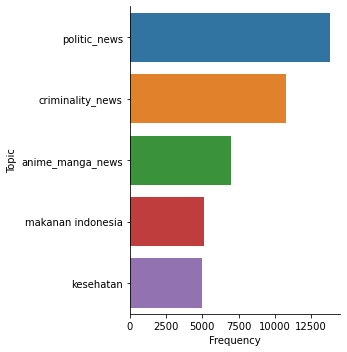

In [18]:
category_count = dataset['topic'].value_counts().to_frame().reset_index()
category_count.columns = ['Topic', 'Frequency']
sns.catplot(x='Frequency', y='Topic', kind='bar', data=category_count)


In [19]:
def total_word(text):
    text = split(text)
    text = [clean_word(t) for t in text]
    text = list(itertools.chain.from_iterable(text))
    text = [t for t in text if t != '']
    return len(text)


Text(0.5, 1.0, 'Distrubution of total word in Title')

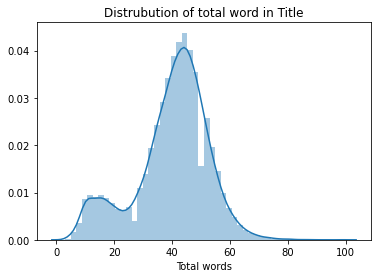

In [20]:
total_title_word = dataset['title'].map(total_word).to_list()
sns.distplot(total_title_word, axlabel='Total words').set_title('Distrubution of total word in Title')


Text(0.5, 1.0, 'Distrubution of total word in Content')

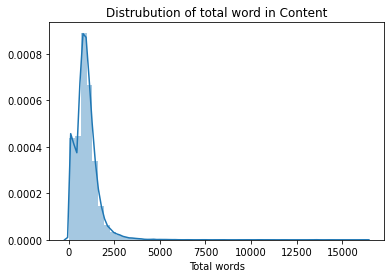

In [21]:
total_content_word = dataset['content'].map(total_word).to_list()
sns.distplot(total_content_word, axlabel='Total words').set_title(
    'Distrubution of total word in Content')


In [22]:
all_words = dataset['title'].map(
    split).to_list()  # get all words by split space
all_words = list(itertools.chain.from_iterable(
    all_words))  # flatten 2d to 1d list
all_words = list(map(clean_word, all_words))  # lower all words
all_words = [w for w in all_words if w != '']  # remove empty
words_occurance = Counter(all_words)

words_freq = []
for i in [1, 2, 3, 4, 5, 10, 15, 20, 25, 50, 75, 100, 200, 300, 400, 500, 1000, 2000]:
    common_words_occurance = {k: v for k, v in words_occurance.items() if v >= i}
    words_freq.append((i, len(common_words_occurance)))
    # print(f'Total words above {i} frequency : {len(common_words_occurance)}')

words_freq = pd.DataFrame(words_freq, columns=['Frequency', 'Total'], dtype='int32')


## Word frequency in title

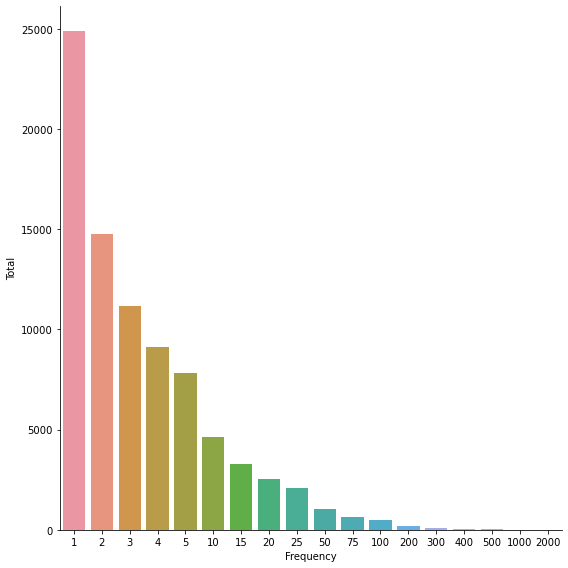

In [23]:
sns.catplot(x='Frequency', y='Total', kind='bar',
            data=words_freq, height=8, aspect=1)


In [24]:
all_words = dataset['content'].map(
    split).to_list()  # get all words by split space
all_words = list(itertools.chain.from_iterable(
    all_words))  # flatten 2d to 1d list
all_words = list(map(clean_word, all_words))  # lower all words
all_words = [w for w in all_words if w != '']  # remove empty
words_occurance = Counter(all_words)

words_freq = []
for i in [1, 2, 3, 4, 5, 10, 15, 20, 25, 50, 75, 100, 200, 300, 400, 500]:
    common_words_occurance = {k: v for k, v in words_occurance.items() if v >= i}
    words_freq.append((i, len(common_words_occurance)))
    # print(f'Total words above {i} frequency : {len(common_words_occurance)}')

words_freq = pd.DataFrame(words_freq, columns=['Frequency', 'Total'], dtype='int32')


## Word frequency in content

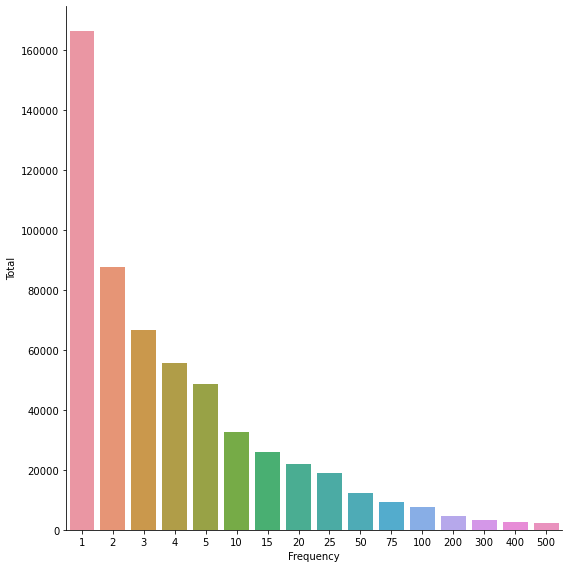

In [25]:
sns.catplot(x='Frequency', y='Total', kind='bar', data=words_freq,
            height=8, aspect=1)
